<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Challenge 1 - Part 1: <strong>Multi-Class Classification model</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for FASHION_MNIST dataset using neural networks</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Aprendizagem Profunda para Visão por Computador 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Objetivo desta parte</a></li>
    <li><a href="#2">Setup para desenvolvimento do projeto</a></li>
    <li><a href="#3">Classificação multi-classe</a></li>
        <ol>
            <li><a href="#3.1">Obter um conjunto de validação</a></li>
            <li><a href="#3.2">Construir o modelo</a></li>
            <li><a href="#3.3">Compilar a rede</a></li>
            <li><a href="#3.4">Treinar o modelo – max 50 épocas, de pref. a usar callbacks</a></li>
            <li><a href="#3.5">Gráfico que mostre a evolução do treino</a></li>
            <li><a href="#3.6">Cálculo dos acertos no conjunto de teste</a></li>
            <li><a href="#3.7">Mostrar a matriz de confusão</a></li>
        </ol>
    <li><a href="#4">Conversão da Classificação multi-classe para Binária</a></li>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Objetivo desta parte** 

1. Obter um conjunto de validação  
2. Construir o modelo  
3. Compilar a rede  
4. Treinar o modelo – máximo de 50 épocas, de preferência usando callbacks  
5. Gráfico que mostre a evolução do treino  
6. Cálculo dos acertos no conjunto de teste  
7. Mostrar a matriz de confusão  



| Id Classe | Significado    | Id Classe | Significado   |
|-----------|--------------|-----------|--------------|
| 0         | T-shirt/top  | 5         | Sandal       |
| 1         | Trouser      | 6         | Shirt        |
| 2         | Pullover     | 7         | Sneaker      |
| 3         | Dress        | 8         | Bag          |
| 4         | Coat         | 9         | Ankle boot   |

# <a class='anchor' id='2'></a>

> # **2. Setup para desenvolvimento do projeto**

In [1]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import sys
import os

In [2]:
# Configurar a seed do TensorFlow
tf.random.set_seed(42)

# Configurar a seed do NumPy
np.random.seed(42)

# Configurar a seed do Keras (caso precise especificar a nível do Keras)
keras.backend.clear_session()

# Definir o número de threads
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Para evitar log excessivo de TensorFlow
os.environ['OMP_NUM_THREADS'] = '1'  # Para limitar o número de threads

# Definir a seed global para a operação de GPU
tf.config.experimental.enable_op_determinism()

In [3]:
import sys
import os

%run ../src/fashionNet.py

# Ou então fazer %load ../src/fashionNet.py

IMG_HEIGHT: 28
IMG_WIDTH: 28
N_CLASSES: 10

Número de amostras no training set original: 60000
Número de amostras no test set original: 10000
Não esquecer que se pretende também gerar um validation set!


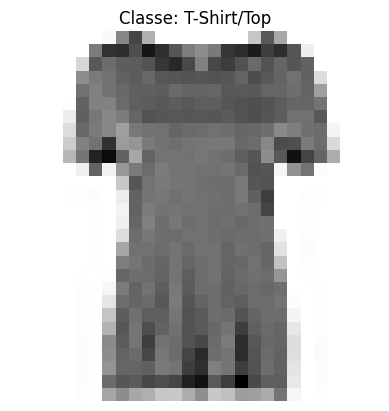

In [4]:
# Visualizar a primeira imagem do conjunto de treino
plt.imshow(x_train[10], cmap="Greys")
plt.title(f'Classe: {LABELS[np.argmax(y_train[10])]}')
plt.axis('off')  # Esconder os eixos
plt.show()

# <a class='anchor' id='3'></a>

> # **3. Classificação multi-classe**

# <a class='anchor' id='3.1'></a>

> ## **a) Obter um conjunto de validação**

In [5]:
# Criar conjunto de validação (17% dos dados de treino)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.17, random_state=42)

print("Número de amostras no training set:", x_train.shape[0])
print("Número de amostras no validation set:", x_val.shape[0])
print("Número de amostras no test set:", x_test.shape[0])

Número de amostras no training set: 49800
Número de amostras no validation set: 10200
Número de amostras no test set: 10000


# <a class='anchor' id='3.2'></a>

> ## **b) Construir o modelo**

In [6]:
# Criar o modelo
modelo = keras.Sequential([
    layers.Input(shape = (IMG_HEIGHT, IMG_WIDTH)),
    layers.Flatten(),  # Transformar imagem 28x28 num vetor 1D
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(N_CLASSES, activation='softmax')  # Camada de saída com as 10 classes da label
])

# <a class='anchor' id='3.3'></a>

> ## **c) Compilar a rede**

In [7]:
# Compilar o modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# <a class='anchor' id='3.4'></a>

> ## **d) Treinar o modelo – max 50 épocas, de pref. a usar callbacks**


In [8]:
# Treinar o modelo (máx. 50 épocas, usando callbacks)
history = modelo.fit(x_train, y_train, epochs=50, batch_size=64, 
                      validation_data=(x_val, y_val),
                      callbacks=[BEST_MODEL_CHECKPOINT, EARLY_STOPPING])

Epoch 1/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7332 - loss: 0.7632 - precision: 0.8382 - recall: 0.6205 - val_accuracy: 0.8443 - val_loss: 0.4247 - val_precision: 0.8871 - val_recall: 0.8038
Epoch 2/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8461 - loss: 0.4290 - precision: 0.8840 - recall: 0.8052 - val_accuracy: 0.8555 - val_loss: 0.3951 - val_precision: 0.8871 - val_recall: 0.8223
Epoch 3/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8621 - loss: 0.3867 - precision: 0.8928 - recall: 0.8292 - val_accuracy: 0.8631 - val_loss: 0.3642 - val_precision: 0.8905 - val_recall: 0.8340
Epoch 4/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8713 - loss: 0.3561 - precision: 0.9001 - recall: 0.8426 - val_accuracy: 0.8746 - val_loss: 0.3385 - val_precision: 0.9025 - val_recall: 0.8502
Epoch 5/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8767 - loss: 0.3378 - precision: 0.9042 - recall: 0.8519 - val_accuracy: 0.8780 - val_loss: 0.

# <a class='anchor' id='3.5'></a>

> ## **e) Gráfico que mostre a evolução do treino**

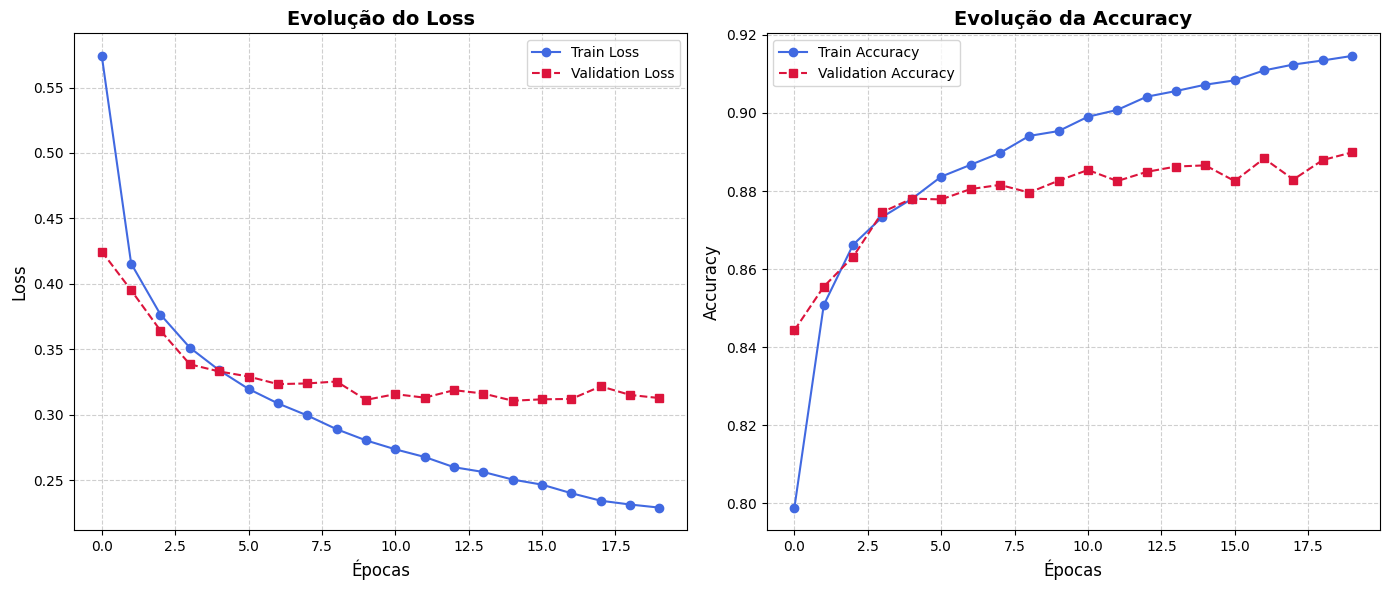

In [9]:
# Criar a figura
plt.figure(figsize=(14, 6))

# Subplot para Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='royalblue', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='crimson', linestyle='--', marker='s')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Evolução do Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot para Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='royalblue', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='crimson', linestyle='--', marker='s')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Evolução da Accuracy', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar espaçamento
plt.tight_layout()
plt.show()


In [10]:
# Carregar melhor modelo em validação
modelo.load_weights("tmp/best_model.weights.h5")

In [11]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

# <a class='anchor' id='3.6'></a>

> ## **f) Cálculo dos acertos no conjunto de teste**

In [12]:
# Avaliação no conjunto de teste
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=0)[:2]
num_acertos = int(test_acc * x_test.shape[0])
print(f'Accuracy no conjunto de teste: {test_acc:.4f}')
print(f'Número absoluto de acertos: {num_acertos}/{x_test.shape[0]}')

Accuracy no conjunto de teste: 0.8808
Número absoluto de acertos: 8808/10000


# <a class='anchor' id='3.7'></a>

> ## **g) Mostrar a matriz de confusão**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


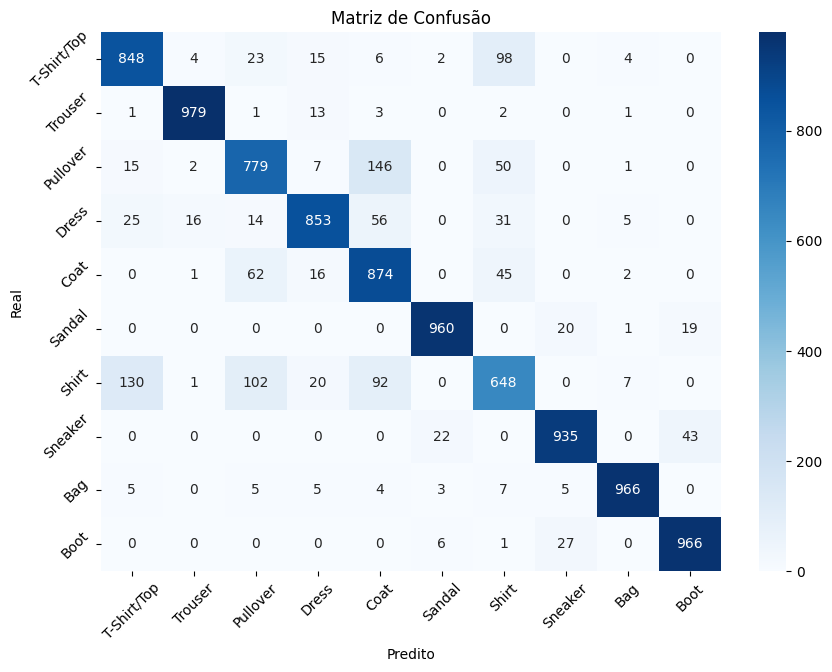

In [13]:
# Predições e matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [14]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_true_classes, y_pred_classes, target_names=LABELS))

Relatório de Classificação:
              precision    recall  f1-score   support

 T-Shirt/Top       0.83      0.85      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.79      0.78      0.78      1000
       Dress       0.92      0.85      0.88      1000
        Coat       0.74      0.87      0.80      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.73      0.65      0.69      1000
     Sneaker       0.95      0.94      0.94      1000
         Bag       0.98      0.97      0.97      1000
        Boot       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# <a class='anchor' id='4'></a>

> # **4. Conversão da Classificação multi-classe para Binária**

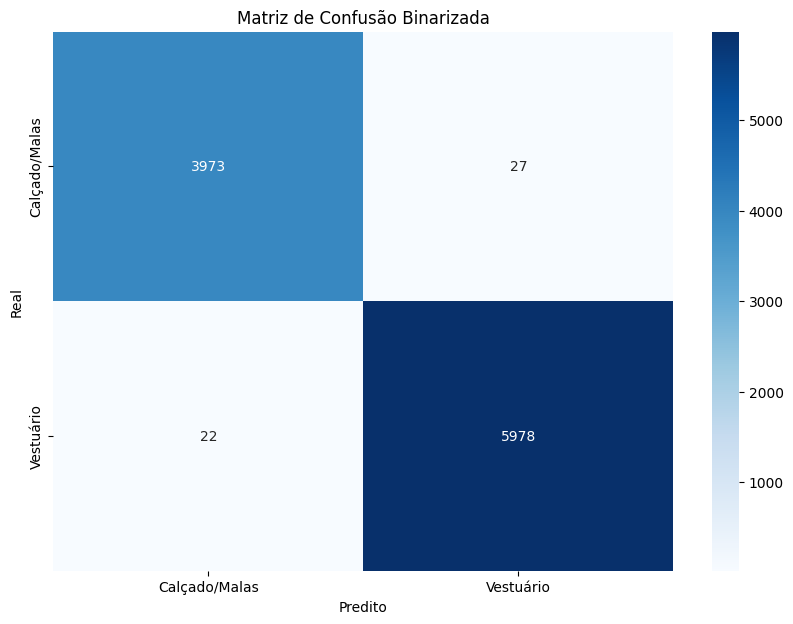

In [15]:
BINARY_MAP = {
    0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 6: 1,  # Vestuário -> 1
    5: 0, 7: 0, 8: 0, 9: 0   # Calçado/Malas -> 0
}

# Aplicar o mapeamento binário aos rótulos verdadeiros e preditos
y_true_bin = np.vectorize(BINARY_MAP.get)(y_true_classes)
y_pred_bin = np.vectorize(BINARY_MAP.get)(y_pred_classes)

# Gerar matriz de confusão binarizada
cm_bin = confusion_matrix(y_true_bin, y_pred_bin)

# Visualizar a matriz de confusão binarizada
plt.figure(figsize=(10, 7))
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues', xticklabels=["Calçado/Malas", "Vestuário"], yticklabels=["Calçado/Malas", "Vestuário"])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão Binarizada')
plt.show()


In [16]:
# Gerar o relatório de métricas
report = classification_report(y_true_bin, y_pred_bin, target_names=["Calçado/Malas", "Vestuário"])

# Exibir o relatório
print(report)

               precision    recall  f1-score   support

Calçado/Malas       0.99      0.99      0.99      4000
    Vestuário       1.00      1.00      1.00      6000

     accuracy                           1.00     10000
    macro avg       0.99      0.99      0.99     10000
 weighted avg       1.00      1.00      1.00     10000



In [17]:
TP = cm_bin[1, 1]  # Verdadeiro Positivo
FP = cm_bin[0, 1]  # Falso Positivo
TN = cm_bin[0, 0]  # Verdadeiro Negativo
FN = cm_bin[1, 0]  # Falso Negativo

# Precisão, Recall e F1-Score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Precisão: 0.995503746877602
Recall: 0.9963333333333333
F1-Score: 0.9959183673469387


# <a class='anchor' id='5'></a>

> # **5. Model Explanation**

In [20]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
# Select the last convolutional layer (or dense layer if no convolutional layers exist)
layer_name = "dense_1"  # Replace with your actual layer name
last_dense_layer = modelo.get_layer(layer_name)

# Define a function to compute Grad-CAM
def compute_gradcam(img_array, model, last_dense_layer):
    grad_model = tf.keras.models.Model(
        [model.inputs], [last_dense_layer.output, model.outputs]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions  # For multi-label, you might want to sum over specific labels

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]  # Remove batch dimension

    # Weight each channel by corresponding gradients
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU

    # Normalize the heatmap
    heatmap /= np.max(heatmap)

    return heatmap.numpy()

# Function to overlay heatmap on image
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * alpha + img
    return np.uint8(superimposed_img)

# Load an example image
img_array = x_train[0]  # Normalize and add batch dimension

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(img_array, modelo, last_dense_layer)

# Overlay heatmap on original image
heatmap_img = overlay_heatmap(img, heatmap)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(heatmap_img)
ax[1].set_title("Activation Heatmap")
ax[1].axis("off")

plt.show()
